In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#trajectory3: delta = .40
#trajectory1: delta = .05 
#trajectory2: delta= .05, tau=5
traj = np.load('trajectory1')
delta=5
tau=5

In [9]:
#xx = [traj['s'].values.ravel()[i] for i in range(len(traj.index))]
traj

,wage,r,s,capital,labor share of gdp,C,P,Y,consensus
time,,,,,,,,,
0.000000,5.000000,0.050000,"[0.128274073351, 0.697030559316, 0.38521391979...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",5.000000,"[0.0871725926649, 0.0302969440684, 0.061478608...",1.0,0.000000,False
0.182134,4.769608,0.052415,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.929483164607, 0.939844006782, 0.93416374981...",4.769608,"[0.0872696063184, 0.0303306612855, 0.061547027...",1.0,9.539216,False
2.047179,2.824731,0.088504,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.259926930672, 0.369204068352, 0.30911681386...",2.824731,"[0.0963346798677, 0.0337590546576, 0.068194859...",1.0,5.649463,False
3.457267,2.131077,0.117312,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.12257295814, 0.221961183759, 0.16521998178,...",2.131077,"[0.0451581977945, 0.0195786962755, 0.035395538...",1.0,4.262155,False
6.476563,0.961923,0.259896,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.0, 0.0642413182484, 0.0158464791331, 0.0365...",0.961923,"[0.0361552235766, 0.0203916745323, 0.032312686...",1.0,1.923847,False
7.497789,0.921504,0.271296,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.00124140612696, 0.0568113330008, 0.01474626...",0.921504,"[0.00803298928085, 0.00807214458055, 0.0083082...",1.0,1.843008,False
10.664554,0.795987,0.314075,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.00331976758453, 0.0402884113503, 0.01181240...",0.795987,"[0.0072787102454, 0.00781749370456, 0.00774096...",1.0,1.591975,False
11.469303,0.789636,0.316602,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.00318275002627, 0.0388741469202, 0.01163192...",0.789636,"[0.00779968050679, 0.00625684522226, 0.0071537...",1.0,1.579271,False
20.904227,0.694917,0.359755,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.00140688900012, 0.0274247822395, 0.00889106...",0.694917,"[0.00705590997079, 0.00634246605352, 0.0068449...",1.0,1.389835,False


In [215]:
N=100
traj['s'].keys()
S = np.zeros(shape=(len(traj.index), N))
K = np.zeros(shape=(len(traj.index), N))
C = np.zeros(shape=(len(traj.index), N))
W = np.zeros(shape=(len(traj.index), N))

for a, t in enumerate(traj.index):
    S[a,:] = traj['s'][t]
    C[a,:] = traj['C'][t]
    K[a,:] = traj['capital'][t]
    W[a,:] = traj['wage'][t]
        


9933 10133


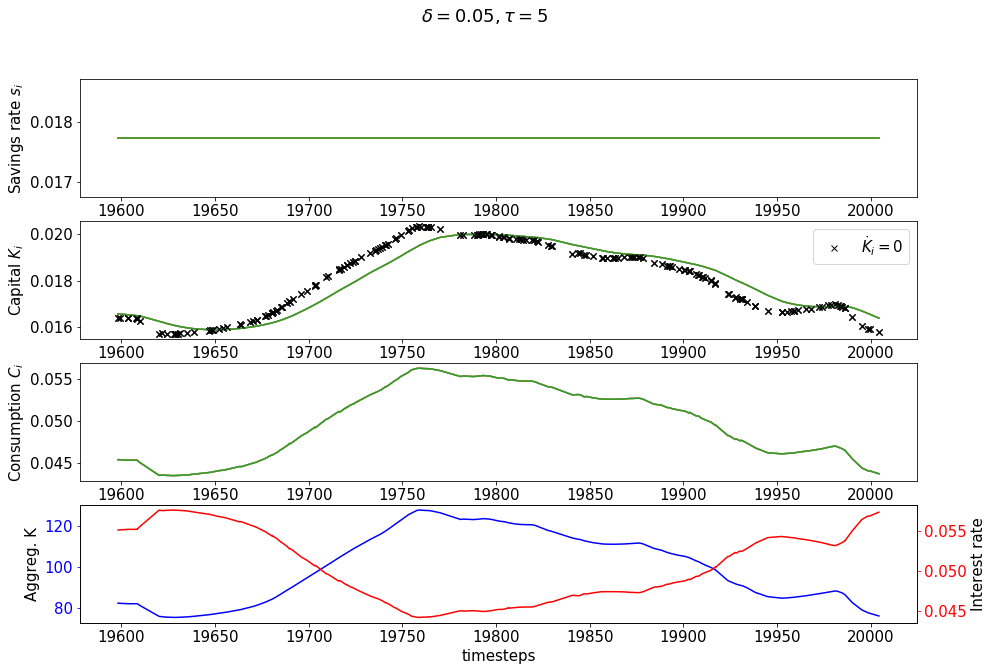

In [252]:
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,10))
plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = len(traj.index) - 200,len(traj.index) 
print start, stop
kidotzero = W[start:stop,:]/((0.05/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=100.
L=10.
for i in range(3):
    ax1.plot(traj.index[start:stop],S[start:stop,i]);
    ax1.set_ylabel(r'Savings rate $s_i$')
    ax2.plot(traj.index[start:stop],K[start:stop,i]);
    ax2.set_ylabel(r'Capital $K_i$')
    ax3.plot(traj.index[start:stop],C[start:stop,i]);
    ax3.set_ylabel(r'Consumption $C_i$')
    ax2.plot(np.array(traj.index[start:stop])[np.argwhere(kidotzero[:,i]<L).T[0]],
             kidotzero[np.argwhere(kidotzero[:,i]<L).T[0],i],
         'kx',label=r'$\dot{K}_i=0$');
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
#ax1.legend();
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');

from collections import OrderedDict
handles, labels = ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys())


ax4.plot(traj.index[start:stop],K[start:stop,:].sum(1),c='b');
ax4.set_ylabel('Aggreg. K')
ax5 = ax4.twinx();
ax5.plot(traj.index[start:stop],traj['r'].values[start:stop],c='r');
ax5.set_ylabel('Interest rate')
ax5.tick_params(axis='y', colors='red')
ax4.tick_params(axis='y', colors='b')
ax4.set_xlabel('timesteps')
ax5.legend(loc='right');
ax4.legend(loc='lower left');
fig.savefig('delta_%s_start%s_stop%s_kidotzero_lowK.pdf'%(delta,start,stop))


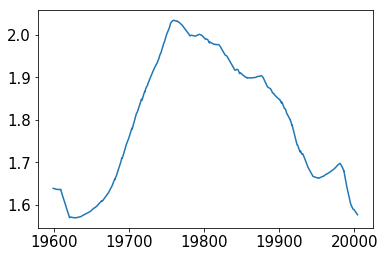

In [234]:
plt.figure()
#plt.plot(kidotzero[:,4])
#np.argwhere(kidotzero[:,4]<L).T[0]
plt.plot(traj.index.values[start:stop][np.argwhere(kidotzero[:,4]<L).T[0]],
         kidotzero[np.argwhere(kidotzero[:,4]<L).T[0],4])
#kidotzero[np.argwhere(kidotzero[:,4]<L).T[0],4]
#plt.plot((0.05/S[start:stop,:]))

time
0.000000         [0.00383458755192, 0.00383458755192, 0.8440399...
3.459380         [0.00383458755192, 0.00383458755192, 0.8440399...
5.211766         [0.00383458755192, 0.00383458755192, 0.8440399...
13.093598        [0.00383458755192, 0.00383458755192, 0.8440399...
21.119902        [0.00383458755192, 0.00383458755192, 0.8440399...
30.830439        [0.00383458755192, 0.00383458755192, 0.8440399...
34.777513        [0.00383458755192, 0.00383458755192, 0.8440399...
40.957622        [0.00383458755192, 0.00383458755192, 0.8440399...
53.700040        [0.00383458755192, 0.00383458755192, 0.8440399...
60.153855        [0.00383458755192, 0.00383458755192, 0.8440399...
69.334764        [0.00383458755192, 0.00383458755192, 0.8440399...
71.283339        [0.00383458755192, 0.00383458755192, 0.8440399...
72.191075        [0.00383458755192, 0.00383458755192, 0.8440399...
73.178348        [0.00383458755192, 0.00383458755192, 0.8440399...
77.801768        [0.00383458755192, 0.00383458755192, 0.8